In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

msft_data = yf.download("MSFT", start="2010-01-01", end="2019-01-01")
print(msft_data.head())

/tmp/ipython-input-2-146399659.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download("MSFT", start="2010-01-01", end="2019-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2010-01-04  23.211443  23.323938  22.941455  22.963954  38409100
2010-01-05  23.218945  23.323941  22.978956  23.136449  49749600
2010-01-06  23.076443  23.308932  22.888951  23.158938  58182400
2010-01-07  22.836458  23.023950  22.641467  22.971451  50559700
2010-01-08  22.993950  23.158942  22.678964  22.708964  51197400


In [ ]:
print(msft_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   2264 non-null   float64
 1   (High, MSFT)    2264 non-null   float64
 2   (Low, MSFT)     2264 non-null   float64
 3   (Open, MSFT)    2264 non-null   float64
 4   (Volume, MSFT)  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB
None


In [ ]:
msft_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,41.835998,42.185959,41.450444,41.829326,4.163436e+07
std,23.656928,23.880380,23.421275,23.676842,2.348979e+07
min,17.415642,17.650272,17.203717,17.476192,7.425600e+06
25%,22.701967,22.892237,22.531265,22.707277,2.586055e+07
50%,35.238880,35.471747,34.940662,35.150741,3.620060e+07
75%,51.782541,52.015685,51.484361,51.818347,5.172612e+07
max,108.083832,108.616683,107.448058,107.906157,3.193179e+08


In [ ]:
msft_data.resample('ME').mean()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-31,22.609099,22.937111,22.371873,22.714884,7.156057e+07
2010-02-28,21.313820,21.469201,21.094701,21.289229,5.656017e+07
2010-03-31,22.045629,22.210410,21.884123,22.041697,4.827118e+07
2010-04-30,22.998141,23.169646,22.796856,22.934634,6.281093e+07
2010-05-31,21.226181,21.603388,20.948448,21.353110,8.600651e+07
...,...,...,...,...,...
2018-08-31,101.439968,101.924647,100.662173,101.224949,1.985340e+07
2018-09-30,104.931227,105.593530,103.972217,104.781152,2.527661e+07


In [ ]:
# Import numpy package
import numpy as np

# assign ‘Close‘ to ‘daily_close‘
daily_close = msft_data[['Close']]

# returns as fractional change
daily_return = daily_close.pct_change()

# replacing NA values with 0
daily_return.fillna(0, inplace=True)

print(daily_return)

Price          Close
Ticker          MSFT
Date                
2010-01-04  0.000000
2010-01-05  0.000323
2010-01-06 -0.006137
2010-01-07 -0.010400
2010-01-08  0.006897
...              ...
2018-12-24 -0.041739
2018-12-26  0.068310
2018-12-27  0.006166
2018-12-28 -0.007808
2018-12-31  0.011754

[2264 rows x 1 columns]


In [ ]:
mdata = msft_data.resample('ME').apply(lambda x: x.iloc[-1])
monthly_return = mdata.pct_change()

print(monthly_return)

Price          Close      High       Low      Open    Volume
Ticker          MSFT      MSFT      MSFT      MSFT      MSFT
Date                                                        
2010-01-31       NaN       NaN       NaN       NaN       NaN
2010-02-28  0.022146 -0.031253  0.035551 -0.037325 -0.791784
2010-03-31  0.021625  0.030156  0.023150  0.034555  0.579367
2010-04-30  0.042677  0.045760  0.046280  0.048246 -0.008551
2010-05-31 -0.151394 -0.155796 -0.155446 -0.164577  0.067739
...              ...       ...       ...       ...       ...
2018-08-31  0.062993  0.060851  0.062338  0.052867 -0.160277
2018-09-30  0.018161  0.015872  0.019369  0.022383 -0.067817
2018-10-31 -0.066101 -0.056123 -0.072924 -0.076627  1.358780
2018-11-30  0.042684  0.030603  0.042152  0.054422 -0.340697
2018-12-31 -0.084047 -0.077228 -0.081565 -0.085005 -0.014608

[108 rows x 5 columns]


In [ ]:
# assigning closing prices to price
price = msft_data['Close']

# calculate the moving average
mav = price.rolling(window=50).mean()

# print the result
print(mav[-10:])

Ticker            MSFT
Date                  
2018-12-17  100.870916
2018-12-18  100.726739
2018-12-19  100.601238
2018-12-20  100.408434
2018-12-21  100.268094
2018-12-24  100.055435
2018-12-26   99.895089
2018-12-27   99.783220
2018-12-28   99.592944
2018-12-31   99.430248


<Axes: xlabel='Date'>

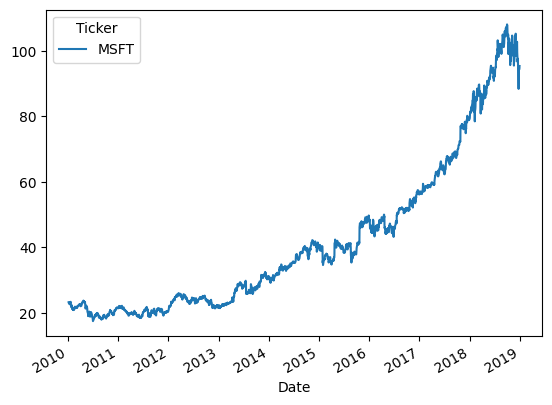

In [ ]:
# import the matplotlib package to see the plot
import matplotlib.pyplot as plt
price.plot()

/tmp/ipython-input-10-1466181231.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)
/tmp/ipython-input-10-1466181231.

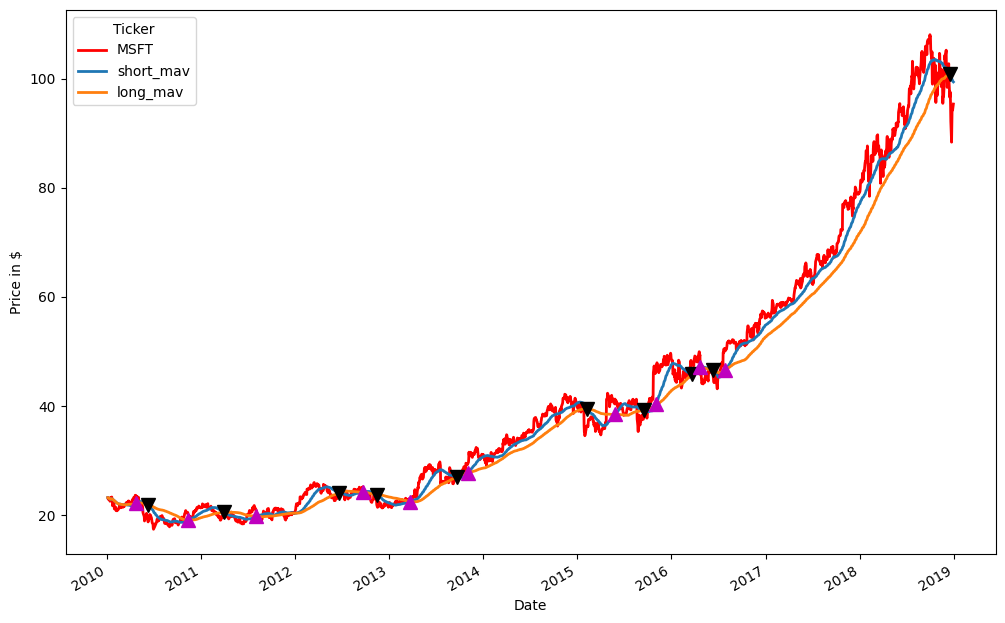

In [ ]:
# step1: initialize the short and long lookback periods
short_lb = 50
long_lb = 120

import pandas as pd
# step2: initialize a new DataFrame called signal_df with the signal column
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Close'].rolling(window=short_lb, min_periods=1, center=False).mean()

# step4: create long simple moving average over the long lookback period
signal_df['long_mav'] = msft_data['Close'].rolling(window=long_lb, min_periods=1, center=False).mean()



# step5: generate the signals based on the conditional statement
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)

# step6: create the trading orders based on the positions column
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]


# initialize the plot using plt
fig = plt.figure()

# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')

msft_data['Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,
         signal_df.short_mav[signal_df.positions == -1.0],
         'v', markersize=10, color='k')

# plotting the buy signals
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,
         signal_df.short_mav[signal_df.positions == 1.0],
         '^', markersize=10, color='m')

# Show the plot
plt.show()